In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:

import matplotlib.pyplot as plt 
import os 
import json

In [58]:
revenue_df = pd.read_csv("revenue_non_zero.csv", dtype={'fullVisitorId': 'str'}, encoding='latin-1')

In [59]:
revenue_df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device_browser,device_operatingSystem,device_isMobile,...,traffic_campaign,traffic_source,traffic_medium,traffic_keyword,traffic_referralPath,traffic_adContent,traffic_adwordsClickInfo.page,traffic_adwordsClickInfo.slot,traffic_adwordsClickInfo.gclId,traffic_adwordsClickInfo.adNetworkType
0,Direct,20160902,6.19419E+18,6194193421514403509_1472843572,1472843572,1,1472843572,Chrome,Linux,False,...,(not set),(direct),(none),NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,5.32717E+18,5327166854580374902_1472844906,1472844906,3,1472844906,Chrome,Macintosh,False,...,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,NaN
2,Referral,20160902,8.88505E+18,8885051388942907862_1472827393,1472827393,7,1472827393,Chrome,Linux,False,...,(not set),mall.googleplex.com,referral,NaN,/,NaN,NaN,NaN,NaN,NaN
3,Referral,20160902,1.85468E+17,0185467632009737931_1472846398,1472846398,6,1472846398,Chrome,Windows,False,...,(not set),mall.googleplex.com,referral,NaN,/,NaN,NaN,NaN,NaN,NaN
4,Referral,20160902,3.24489E+18,3244885836845029978_1472824817,1472824817,4,1472824817,Chrome,Macintosh,False,...,(not set),mall.googleplex.com,referral,NaN,/,NaN,NaN,NaN,NaN,NaN


In [54]:
revenue_df.dtypes

channelGrouping                            object
date                                        int64
fullVisitorId                              object
sessionId                                  object
visitId                                     int64
visitNumber                                 int64
visitStartTime                              int64
device_browser                             object
device_operatingSystem                     object
device_isMobile                              bool
device_deviceCategory                      object
geo_continent                              object
geo_subContinent                           object
geo_country                                object
geo_region                                 object
geo_metro                                  object
geo_city                                   object
geo_networkDomain                          object
totals_hits                                 int64
totals_pageviews                            int64


In [14]:

# revenue_df.groupby("channelGrouping").size()
for column in revenue_df.keys():
    print(revenue_df.groupby(column).size())
    
    print('\n')
    print('\n')

channelGrouping
(Other)              1
Affiliates           9
Direct            2042
Display            142
Organic Search    3438
Paid Search        468
Referral          5311
Social             104
dtype: int64




date
20160801    34
20160802    17
20160804    17
20160805    41
20160806    10
20160807    16
20160808    34
20160809    42
20160810    46
20160811    45
20160812    71
20160813    14
20160814    23
20160815    65
20160816    59
20160817    40
20160818    43
20160819    50
20160820    21
20160821    23
20160822    57
20160823    57
20160824    47
20160825    62
20160826    39
20160827    15
20160828    22
20160829    43
20160830    34
20160831    32
            ..
20170703    13
20170704     7
20170705    41
20170706    30
20170707    38
20170708    14
20170709    19
20170710    44
20170711    40
20170712    48
20170713    62
20170714    44
20170715    16
20170716    27
20170717    49
20170718    50
20170719    56
20170720    40
20170721    41
20170722    17
20170723    1

In [60]:
revenue_df["timestamp"] = pd.DataFrame(pd.to_datetime(revenue_df["visitStartTime"], unit="s"))

In [61]:
revenue_df.head(20)

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device_browser,device_operatingSystem,device_isMobile,...,traffic_source,traffic_medium,traffic_keyword,traffic_referralPath,traffic_adContent,traffic_adwordsClickInfo.page,traffic_adwordsClickInfo.slot,traffic_adwordsClickInfo.gclId,traffic_adwordsClickInfo.adNetworkType,timestamp
0,Direct,20160902,6.19419E+18,6194193421514403509_1472843572,1472843572,1,1472843572,Chrome,Linux,False,...,(direct),(none),NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-02 19:12:52
1,Organic Search,20160902,5.32717E+18,5327166854580374902_1472844906,1472844906,3,1472844906,Chrome,Macintosh,False,...,google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,2016-09-02 19:35:06
2,Referral,20160902,8.88505E+18,8885051388942907862_1472827393,1472827393,7,1472827393,Chrome,Linux,False,...,mall.googleplex.com,referral,NaN,/,NaN,NaN,NaN,NaN,NaN,2016-09-02 14:43:13
3,Referral,20160902,1.85468E+17,0185467632009737931_1472846398,1472846398,6,1472846398,Chrome,Windows,False,...,mall.googleplex.com,referral,NaN,/,NaN,NaN,NaN,NaN,NaN,2016-09-02 19:59:58
4,Referral,20160902,3.24489E+18,3244885836845029978_1472824817,1472824817,4,1472824817,Chrome,Macintosh,False,...,mall.googleplex.com,referral,NaN,/,NaN,NaN,NaN,NaN,NaN,2016-09-02 14:00:17
5,Referral,20160902,3.35154E+18,3351538799616866750_1472855945,1472855945,2,1472855945,Chrome,Linux,False,...,mall.googleplex.com,referral,NaN,/,NaN,NaN,NaN,NaN,NaN,2016-09-02 22:39:05
6,Direct,20160902,1.77666E+18,1776658355119092313_1472861525,1472861525,1,1472861525,Safari,Macintosh,False,...,(direct),(none),NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-03 00:12:05
7,Referral,20160902,7.70432E+17,770431600902969839_1472836071,1472836071,13,1472836071,Chrome,Linux,False,...,mall.googleplex.com,referral,NaN,/,NaN,NaN,NaN,NaN,NaN,2016-09-02 17:07:51
8,Organic Search,20160902,7.14711E+18,7147112211830167925_1472853332,1472853332,1,1472853332,Chrome,Android,True,...,google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,2016-09-02 21:55:32
9,Referral,20160902,6.66473E+18,6664733704830724714_1472853995,1472853995,7,1472853995,Chrome,Chrome OS,False,...,sites.google.com,referral,NaN,/a/google.com/google-merchandise-store/home/on...,NaN,NaN,NaN,NaN,NaN,2016-09-02 22:06:35


In [63]:
dates = []
corresponding_count = []

In [64]:
for specific_date, count in revenue_df.groupby("date").size().iteritems():
    dates.append(specific_date)
    corresponding_count.append(count)
    

In [65]:
len(dates), len(corresponding_count)

(365, 365)

In [66]:
xs = [i + 0.1 for i, _ in enumerate(dates)]

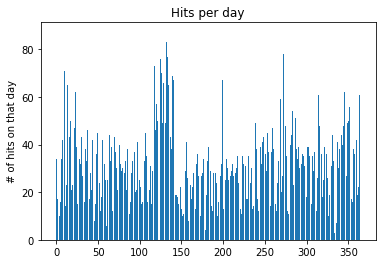

In [67]:
plt.bar(xs, corresponding_count)
plt.ylabel("# of hits on that day")
plt.title("Hits per day")
# plt.xticks([i + 0.5 for i, _ in enumerate(dates)], dates)
plt.show()

In [68]:
improper_date_count = 0 
for index, that_date in revenue_df["date"].iteritems():
    if len(str(that_date)) != 8:
        improper_date_count += 1
improper_date_count

0

In [70]:

revenue_df['date']= pd.to_datetime(revenue_df['date'] ,format='%Y%m%d')

In [127]:
revenue_df.dtypes

channelGrouping                                   object
date                                      datetime64[ns]
fullVisitorId                                     object
sessionId                                         object
visitId                                            int64
visitNumber                                        int64
visitStartTime                                     int64
device_browser                                    object
device_operatingSystem                            object
device_isMobile                                     bool
device_deviceCategory                             object
geo_continent                                     object
geo_subContinent                                  object
geo_country                                       object
geo_region                                        object
geo_metro                                         object
geo_city                                          object
geo_networkDomain              

In [36]:
df_1 = pd.DataFrame(revenue_df.date.dt.is_month_end)
df_1 = df_1.rename(index=str, columns={"date": "is_month_end"})

df_1.shape

(11515, 1)

In [51]:
type(df_1)

pandas.core.frame.DataFrame

In [40]:
df_1[df_1["is_month_end"] == False] = 0

In [41]:
df_1[df_1["is_month_end"] == True] = 1

In [ ]:
df_2 = pd.DataFrame(revenue_df.date.dt.is_month_start)
df_2 = df_2.rename(index=str, columns={"date": "is_month_start"})
df_2.shape

In [130]:
df_3 = pd.DataFrame(revenue_df.date.dt.is_year_end)
df_3 = df_3.rename(index=str, columns={"date": "is_year_end"})
df_4 = pd.DataFrame(revenue_df.date.dt.is_year_start)
df_4 = df_4.rename(index=str, columns={"date": "is_year_start"})
df_3.shape, df_4.shape

((11515, 1), (11515, 1))

In [132]:
df_5 = pd.DataFrame(revenue_df.date.dt.is_quarter_end)
df_5 = df_5.rename(index=str, columns={"date": "is_quarter_end"})
df_6 = pd.DataFrame(revenue_df.date.dt.is_quarter_start)
df_6 = df_6.rename(index=str, columns={"date": "is_quarter_start"})
df_7 = pd.DataFrame(revenue_df.date.dt.weekofyear)
df_7 = df_7.rename(index=str, columns={"date": "weekofyear"})
df_5.shape, df_6.shape, df_7.shape

((11515, 1), (11515, 1), (11515, 1))

In [73]:
revenue_df["is_month_start"] = pd.DataFrame(revenue_df.date.dt.is_month_start)

In [77]:
revenue_df["is_month_end"] = pd.DataFrame(revenue_df.date.dt.is_month_end)

In [78]:
revenue_df["is_year_end"] = pd.DataFrame(revenue_df.date.dt.is_year_end)

In [79]:
revenue_df["is_year_start"] = pd.DataFrame(revenue_df.date.dt.is_year_start)

In [80]:
revenue_df["is_quarter_end"] = pd.DataFrame(revenue_df.date.dt.is_quarter_end)

In [81]:
revenue_df["is_quarter_start"] = pd.DataFrame(revenue_df.date.dt.is_quarter_start)

In [82]:
revenue_df["weekofyear"] = pd.DataFrame(revenue_df.date.dt.weekofyear)

In [84]:
revenue_df.head(20)

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device_browser,device_operatingSystem,device_isMobile,...,traffic_adwordsClickInfo.gclId,traffic_adwordsClickInfo.adNetworkType,timestamp,is_month_end,is_month_start,is_year_end,is_year_start,is_quarter_end,is_quarter_start,weekofyear
0,Direct,2016-09-02,6.19419E+18,6194193421514403509_1472843572,1472843572,1,1472843572,Chrome,Linux,False,...,NaN,NaN,2016-09-02 19:12:52,False,False,False,False,False,False,35
1,Organic Search,2016-09-02,5.32717E+18,5327166854580374902_1472844906,1472844906,3,1472844906,Chrome,Macintosh,False,...,NaN,NaN,2016-09-02 19:35:06,False,False,False,False,False,False,35
2,Referral,2016-09-02,8.88505E+18,8885051388942907862_1472827393,1472827393,7,1472827393,Chrome,Linux,False,...,NaN,NaN,2016-09-02 14:43:13,False,False,False,False,False,False,35
3,Referral,2016-09-02,1.85468E+17,0185467632009737931_1472846398,1472846398,6,1472846398,Chrome,Windows,False,...,NaN,NaN,2016-09-02 19:59:58,False,False,False,False,False,False,35
4,Referral,2016-09-02,3.24489E+18,3244885836845029978_1472824817,1472824817,4,1472824817,Chrome,Macintosh,False,...,NaN,NaN,2016-09-02 14:00:17,False,False,False,False,False,False,35
5,Referral,2016-09-02,3.35154E+18,3351538799616866750_1472855945,1472855945,2,1472855945,Chrome,Linux,False,...,NaN,NaN,2016-09-02 22:39:05,False,False,False,False,False,False,35
6,Direct,2016-09-02,1.77666E+18,1776658355119092313_1472861525,1472861525,1,1472861525,Safari,Macintosh,False,...,NaN,NaN,2016-09-03 00:12:05,False,False,False,False,False,False,35
7,Referral,2016-09-02,7.70432E+17,770431600902969839_1472836071,1472836071,13,1472836071,Chrome,Linux,False,...,NaN,NaN,2016-09-02 17:07:51,False,False,False,False,False,False,35
8,Organic Search,2016-09-02,7.14711E+18,7147112211830167925_1472853332,1472853332,1,1472853332,Chrome,Android,True,...,NaN,NaN,2016-09-02 21:55:32,False,False,False,False,False,False,35
9,Referral,2016-09-02,6.66473E+18,6664733704830724714_1472853995,1472853995,7,1472853995,Chrome,Chrome OS,False,...,NaN,NaN,2016-09-02 22:06:35,False,False,False,False,False,False,35


In [85]:
revenue_df.drop(["fullVisitorId", "sessionId", "visitId", "visitStartTime"], axis=1, inplace=True)

In [86]:
revenue_df.head()

,channelGrouping,date,visitNumber,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geo_continent,geo_subContinent,geo_country,...,traffic_adwordsClickInfo.gclId,traffic_adwordsClickInfo.adNetworkType,timestamp,is_month_end,is_month_start,is_year_end,is_year_start,is_quarter_end,is_quarter_start,weekofyear
0,Direct,2016-09-02,1,Chrome,Linux,False,desktop,Americas,Northern America,United States,...,NaN,NaN,2016-09-02 19:12:52,False,False,False,False,False,False,35
1,Organic Search,2016-09-02,3,Chrome,Macintosh,False,desktop,Americas,Northern America,United States,...,NaN,NaN,2016-09-02 19:35:06,False,False,False,False,False,False,35
2,Referral,2016-09-02,7,Chrome,Linux,False,desktop,Americas,Northern America,United States,...,NaN,NaN,2016-09-02 14:43:13,False,False,False,False,False,False,35
3,Referral,2016-09-02,6,Chrome,Windows,False,desktop,Americas,Northern America,United States,...,NaN,NaN,2016-09-02 19:59:58,False,False,False,False,False,False,35
4,Referral,2016-09-02,4,Chrome,Macintosh,False,desktop,Americas,Northern America,United States,...,NaN,NaN,2016-09-02 14:00:17,False,False,False,False,False,False,35
